In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [404]:
bom_df = pd.read_csv("../Data/bom.movie_gross.csv")

In [405]:
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [406]:
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [407]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [408]:
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'],errors = 'coerce')

In [409]:
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'],errors = 'coerce')

In [410]:
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

In [411]:
bom_df.duplicated().sum()

0

In [412]:
bom_df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [413]:
studio_null_percent, domestic_null_percent, foreign_null_percent = (5/3387)*100, (28/3387)*100, (1355/3387)*100
studio_null_percent, domestic_null_percent, foreign_null_percent


(0.14762326542663123, 0.8266902863891349, 40.00590493061706)

Since studio and domestic_gross have a very small percentage of missing values we can drop the missing values in them. foreign_gross has a high percent of missing values hence we fill the missig values using mean or median according to skewness.

In [414]:
bom_df = bom_df.dropna(subset = ['studio'])

In [415]:
bom_df = bom_df.dropna(subset = ['domestic_gross'])

In [416]:
median_foreign_gross = bom_df['foreign_gross'].median()
median_foreign_gross

19600000.0

In [417]:
mean_foreign_gross = bom_df['foreign_gross'].mean()
mean_foreign_gross

75979668.67282717

since mean!= median, the data is asymmetrical (skewed), we will use the median to replace the missing values

In [418]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(mean_foreign_gross)

In [419]:
bom_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [420]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


tn.movie_budgets

In [421]:
tn_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [422]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [423]:
tn_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [424]:
tn_df.duplicated().sum()

0

In [425]:
tn_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [426]:
tn_df['production_budget'] = tn_df['production_budget'].str.replace(r'[\$,]', '').astype(float)
tn_df['domestic_gross'] = tn_df['domestic_gross'].str.replace(r'[\$,]', '').astype(float)
tn_df['worldwide_gross'] = tn_df['worldwide_gross'].str.replace(r'[\$,]', '').astype(float)

In [427]:
import sqlite3

In [428]:
conn = sqlite3.connect("../Data/im.db")


In [429]:
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [430]:
im_df = pd.read_sql("SELECT * FROM movie_basics LIMIT 5;", conn)
im_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [431]:
ratings = pd.read_sql(
'''
SELECT * 
FROM movie_ratings 
LIMIT 5;
''',conn)
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [432]:
persons = pd.read_sql("SELECT * FROM persons LIMIT 15;", conn)
persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,None,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,None,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,None,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,None,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,None,"production_designer,art_department,set_decorator"
5,nm0062879,Ruel S. Bayani,NaN,None,"director,production_manager,miscellaneous"
6,nm0063198,Bayou,NaN,None,actor
7,nm0063432,Stevie Be-Zet,NaN,None,"composer,soundtrack"
8,nm0063618,Jeff Beal,1963.0,None,"composer,music_department,soundtrack"
9,nm0063750,Lindsay Beamish,NaN,None,"actress,miscellaneous"


In [433]:
im_df = pd.read_sql("""SELECT * FROM movie_basics
                    JOIN movie_ratings
                    USING(movie_id);
                    """,conn)
im_df.head(10)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


In [434]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [435]:
im_df.duplicated().sum()

0

In [436]:
im_df.isnull().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [437]:
runtime_null_percent, genres_null_percent = (7620/73856) * 100, (804/73856) * 100
runtime_null_percent,genres_null_percent


(10.317374350086656, 1.0886048526863086)

genres has a very small percentage of missing values (~1.09%) hence its missing values can be dropped. runtime has a roughly large percentage of missing values hence we'll fill the missing values using mean or median depending on skewness.

In [438]:
im_df = im_df.dropna(subset = ['genres'])

In [439]:
mean_runtime = im_df['runtime_minutes'].mean()
mean_runtime

94.7322732805843

In [440]:
median_runtime = im_df['runtime_minutes'].median()
median_runtime


91.0

Since the mean != median the data is not symmetrical meaning mean is affected by outliers. Therefore, we'll use median to fill the missing values in runtime_minutes.

In [441]:
im_df['runtime_minutes'] = im_df['runtime_minutes'].fillna(median_runtime)

In [442]:
im_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

### **Data Preparation, Analysis and Visualization**

**Data Preparation**


In [443]:
im_df_analysis = im_df.copy()
im_df.head(2)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43


In [444]:
bom_df_analysis = bom_df.copy()
bom_df_analysis.head(2)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [445]:
bom_df_analysis['total_gross'] = (bom_df_analysis['domestic_gross'] + bom_df_analysis['foreign_gross']).astype(int)
bom_df_analysis.head(2)


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1025500000


In [446]:
# Split the genre strings into lists
im_df_analysis['genres'] = im_df_analysis['genres'].str.split(',')

# Expand(explode) each list into separate rows (one genre per movie)
im_df_analysis = im_df_analysis.explode('genres')

im_df_analysis.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43


In [447]:
analysis_df = pd.merge(bom_df_analysis, im_df_analysis, left_on='title', right_on='primary_title', how='inner')
analysis_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Adventure,8.3,682218
1,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Animation,8.3,682218
2,Toy Story 3,BV,415000000.0,652000000.0,2010,1067000000,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,Comedy,8.3,682218
3,Inception,WB,292600000.0,535700000.0,2010,828300000,tt1375666,Inception,Inception,2010,148.0,Action,8.8,1841066
4,Inception,WB,292600000.0,535700000.0,2010,828300000,tt1375666,Inception,Inception,2010,148.0,Adventure,8.8,1841066


**Data Analysis and Visualization**

#### Objective 1: Genre vs Total Gross and Ratings

In [448]:
genre_comparison = analysis_df.groupby('genres')[['averagerating', 'total_gross']].mean().reset_index()
genre_comparison

,genres,averagerating,total_gross
0,Action,6.277031,1.875184e+08
1,Adventure,6.482151,2.857714e+08
2,Animation,6.698013,2.710097e+08
3,Biography,6.973333,7.929262e+07
4,Comedy,6.254496,1.098373e+08
5,Crime,6.480688,7.865523e+07
6,Documentary,7.291928,7.454730e+07
7,Drama,6.592546,7.393798e+07
8,Family,6.220690,1.385375e+08
9,Fantasy,6.247337,1.808662e+08


In [449]:
genre_comparison['combined_rank'] = (
    genre_comparison['averagerating'].rank(ascending=False) +
    genre_comparison['total_gross'].rank(ascending=False))
genre_comparison = genre_comparison.sort_values(by='combined_rank')
genre_comparison

,genres,averagerating,total_gross,combined_rank
2,Animation,6.698013,2.710097e+08,11.0
1,Adventure,6.482151,2.857714e+08,13.0
18,Sport,6.867925,1.094641e+08,13.0
17,Sci-Fi,6.458209,3.012945e+08,14.0
3,Biography,6.973333,7.929262e+07,17.0
6,Documentary,7.291928,7.454730e+07,17.0
0,Action,6.277031,1.875184e+08,20.0
15,News,7.100000,7.319510e+07,21.0
21,Western,6.561905,9.366207e+07,21.0
9,Fantasy,6.247337,1.808662e+08,24.0


Note that combined_rank column shows ranks of each genre hence lower combined_rank = better performing genre.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


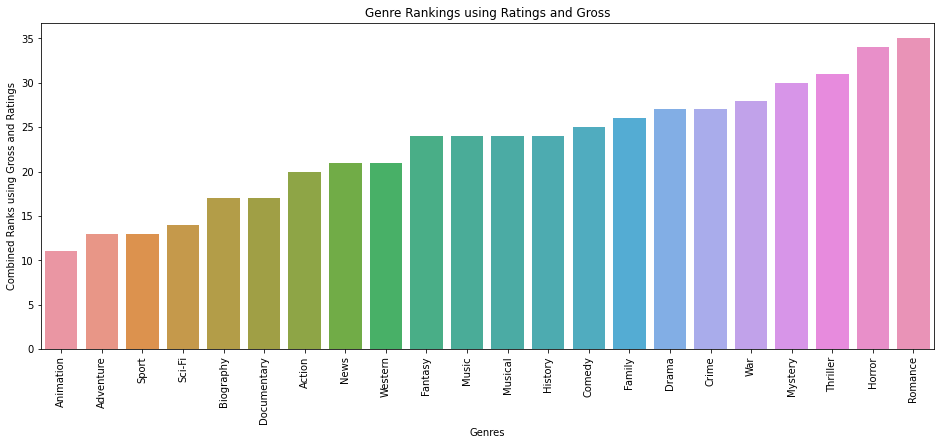

In [450]:
plt.figure(figsize = (16,6))
sns.barplot(genre_comparison['genres'], genre_comparison['combined_rank'])
plt.xticks(rotation=90)
plt.title('Genre Rankings using Ratings and Gross')
plt.xlabel('Genres')
plt.ylabel('Combined Ranks using Gross and Ratings')
plt.show();

From the above analysis and visualization, our results show that animation is the best performing genre followed by adventure and sports. Romance, Horror and Thriller appear to be the lowest performing genres.

#### Objective 2: Do Ratings affect the Total Gross?

In [451]:
correlation = np.corrcoef(analysis_df['averagerating'],analysis_df['total_gross'])[0,1]
correlation

0.1550654558283985

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


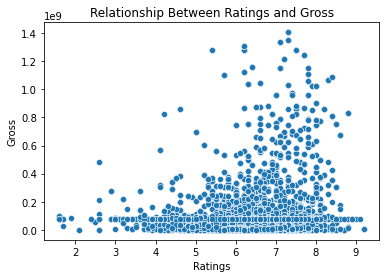

In [452]:
sns.scatterplot(analysis_df['averagerating'],analysis_df['total_gross'])
plt.title('Relationship Between Ratings and Gross')
plt.xlabel('Ratings')
plt.ylabel('Gross');

The above analysis and visuaiation shows that Ratings do not affect the gross. This means a movie can hae a small rating and still earn a lot.  
Example: An animation movie was watched by many people but they didn't like it hence rating will be low while gross is high.